In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read in csv.  Created new column for hypotenuse in excel before reading in.
shots = pd.read_csv('shotshyp_data.csv')

In [3]:
shots

,team,x,y,hyp,fgmade
0,Team B,8.5,28.7,29.932257,0
1,Team B,9.3,27.1,28.651353,0
2,Team A,-18.2,22.1,28.629530,0
3,Team B,15.6,23.7,28.373403,0
4,Team B,-20.1,19.7,28.144271,0
...,...,...,...,...,...
499,Team B,0.0,-0.5,0.500000,1
500,Team A,0.3,0.3,0.424264,0
501,Team A,0.1,0.3,0.316228,1
502,Team B,-0.1,0.0,0.100000,1


In [4]:
#Subset Team A
TeamA = shots[shots['team'] == 'Team A']

In [5]:
TeamA

,team,x,y,hyp,fgmade
2,Team A,-18.2,22.1,28.629530,0
5,Team A,11.3,25.1,27.526351,0
6,Team A,15.4,22.8,27.513633,1
7,Team A,-3.4,27.2,27.411676,0
8,Team A,13.2,23.9,27.302930,0
...,...,...,...,...,...
495,Team A,0.0,-0.5,0.500000,0
496,Team A,0.0,-0.5,0.500000,1
497,Team A,0.0,-0.5,0.500000,0
500,Team A,0.3,0.3,0.424264,0


In [6]:
#Subset Team B
TeamB = shots[shots['team'] == 'Team B']

In [7]:
TeamB

,team,x,y,hyp,fgmade
0,Team B,8.5,28.7,29.932257,0
1,Team B,9.3,27.1,28.651353,0
3,Team B,15.6,23.7,28.373403,0
4,Team B,-20.1,19.7,28.144271,0
15,Team B,-15.0,22.2,26.792536,1
...,...,...,...,...,...
488,Team B,-0.5,0.3,0.583095,1
498,Team B,0.0,-0.5,0.500000,1
499,Team B,0.0,-0.5,0.500000,1
502,Team B,-0.1,0.0,0.100000,1


In [8]:
#Create function for classifying shots as Corner 3, Non Corner 3, and 2 Point for Tean A
def f(TeamA):
    if TeamA['y'] < 7.8 and abs(TeamA['x']) < 22:
        val="2PT"
    elif TeamA['hyp'] >= 23.75 and TeamA['y']>=7.8:
        val='NC3'
    elif TeamA['hyp']<23.75 and TeamA['y']>=7.8:
        val='2PT'
    elif TeamA['y']<7.8 and abs(TeamA['x'])>=22:
        val ='C3'
    return val

In [9]:
#Create new column for shot classification for Team A
TeamA['Classification']=shots.apply(f, axis=1)

<ipython-input-9-ac0bb2350bb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TeamA['Classification']=shots.apply(f, axis=1)


In [10]:
TeamA

,team,x,y,hyp,fgmade,Classification
2,Team A,-18.2,22.1,28.629530,0,NC3
5,Team A,11.3,25.1,27.526351,0,NC3
6,Team A,15.4,22.8,27.513633,1,NC3
7,Team A,-3.4,27.2,27.411676,0,NC3
8,Team A,13.2,23.9,27.302930,0,NC3
...,...,...,...,...,...,...
495,Team A,0.0,-0.5,0.500000,0,2PT
496,Team A,0.0,-0.5,0.500000,1,2PT
497,Team A,0.0,-0.5,0.500000,0,2PT
500,Team A,0.3,0.3,0.424264,0,2PT


In [11]:
#Get number of attempts per zone for Team A
TeamA['Classification'].value_counts()

2PT    194
NC3     69
C3      17
Name: Classification, dtype: int64

In [24]:
#Get total number of shots for Team A
len(TeamA['Classification'])

280

In [25]:
#Get percentage of 2PT for Team A
194/280

0.6928571428571428

In [27]:
#Get percentage of NC3 for Team A
69/280

0.24642857142857144

In [28]:
#Get percentage of C3 for Team A
17/280

0.060714285714285714

Text(0.5, 1.0, 'Team A Shot Distribution')

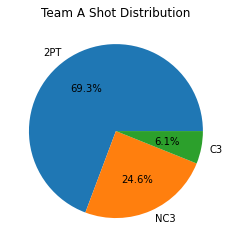

In [40]:
#Create pie chart of Team A shot distribution
classA = ['2PT','NC3','C3']
dataA=[194,69,17]
plt.pie(dataA, labels=classA,autopct='%1.1f%%')
plt.title('Team A Shot Distribution')

In [44]:
#Get number of made 2 PT for Team A 
len(TeamA[(TeamA['Classification'] == '2PT') & 
                                    (TeamA['fgmade'] == 1)])

95

In [45]:
#EFG for 2PT is 2PT made / 2PT attempted since no 3s are made
95/194

0.4896907216494845

In [46]:
#Get number of made NC3 for Team A 
len(TeamA[(TeamA['Classification'] == 'NC3') & 
                                    (TeamA['fgmade'] == 1)])

22

In [47]:
#NC3 EFG for TeamA
(22+.5*22)/69

0.4782608695652174

In [48]:
#Get number of made C3 for Team A 
len(TeamA[(TeamA['Classification'] == 'C3') & 
                                    (TeamA['fgmade'] == 1)])

8

In [49]:
#C3 EFG for Team A
(8+8*.5)/17

0.7058823529411765

In [12]:
#Create function for classifying shots as Corner 3, Non Corner 3, and 2 Point for Team B
def f1(TeamB):
    if TeamB['y'] < 7.8 and abs(TeamB['x']) < 22:
        val="2PT"
    elif TeamB['hyp'] >= 23.75 and TeamB['y']>=7.8:
        val='NC3'
    elif TeamB['hyp']<23.75 and TeamB['y']>=7.8:
        val='2PT'
    elif TeamB['y']<7.8 and abs(TeamB['x'])>=22:
        val ='C3'
    return val

In [13]:
#Create new column for shot classification for Team B
TeamB['Classification']=shots.apply(f1, axis=1)

<ipython-input-13-3c1354c96c1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TeamB['Classification']=shots.apply(f1, axis=1)


In [14]:
#Get number of attempts per zone for Team B
TeamB['Classification'].value_counts()

2PT    150
NC3     62
C3      12
Name: Classification, dtype: int64

In [22]:
#Get shot percentage for TeamA C3
12/280

0.04285714285714286

In [29]:
#Get total number of shots for Team B
len(TeamB['Classification'])

224

In [30]:
#Get percentage of 2PT for Team B
150/224

0.6696428571428571

In [31]:
#Get percentage of NC3 for Team B
62/224

0.2767857142857143

In [32]:
#Get percentage of C3 for Team B
12/224

0.05357142857142857

Text(0.5, 1.0, 'Team B Shot Distribution')

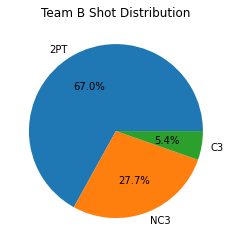

In [41]:
#Create pie chart of Team B shot distribution
classB = ['2PT','NC3','C3']
dataB=[150,62,12]
plt.pie(dataB, labels=classB,autopct='%1.1f%%')
plt.title('Team B Shot Distribution')

In [50]:
#Get number of made 2 PT for Team B 
len(TeamB[(TeamB['Classification'] == '2PT') & 
                                    (TeamB['fgmade'] == 1)])

67

In [51]:
#EFG for 2PT Team B
67/150

0.44666666666666666

In [54]:
#Get number of made NC3 for Team B 
len(TeamB[(TeamB['Classification'] == 'NC3') & 
                                    (TeamB['fgmade'] == 1)])

21

In [55]:
#EFG for NC3 Team B
(21+.5*21)/62

0.5080645161290323

In [56]:
#Get number of made C3 for Team B 
len(TeamB[(TeamB['Classification'] == 'C3') & 
                                    (TeamB['fgmade'] == 1)])

4

In [57]:
#EFG for C3 for Team B
(4+4*.5)/12

0.5